# Lab 7: Convolutions and Convolutional neural networks

```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice simple deep learning model in Pytorch.

Lab Plan
1. Convolutions - application examples
2. Building CNN in PyTorch
    - example CNN
    - comparing with Fully-connected NN

```

<hr>

## 1. Recap

1. What is the use of convolutions? (In general)
2. Why use convolutional layers instead of fully-connected ones?



## 2. Convolutions
Let's upload some image (you can try your own image changing the url)

In [1]:
import urllib.request
url = "https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/lss423kothpqpjpwbzg0"
filename = 'grid_img.jpg'
urllib.request.urlretrieve(url, filename)

('grid_img.jpg', <http.client.HTTPMessage at 0x7bcc2fc842e0>)

## 2. Reading image data

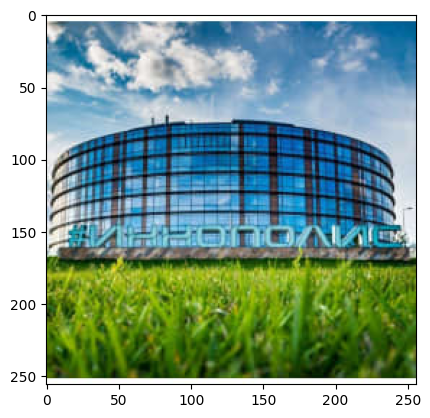

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

# Let's read and plot the image
image = plt.imread('grid_img.jpg')

plt.imshow(image)

## 2.1 Operations on Image Data

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


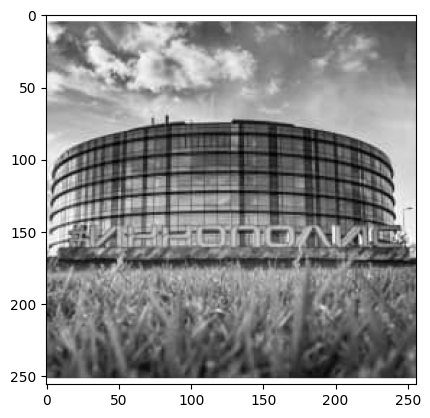

In [ ]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

## 2.2 Convolutions for edge-detecting

In [ ]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')

vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

# out_h = ndimage.convolve(gray_image, sobel_horizontal, mode='reflect')
# out_v = ndimage.convolve(gray_image, sobel_vertical, mode='reflect')

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

Horizontal kernel applied


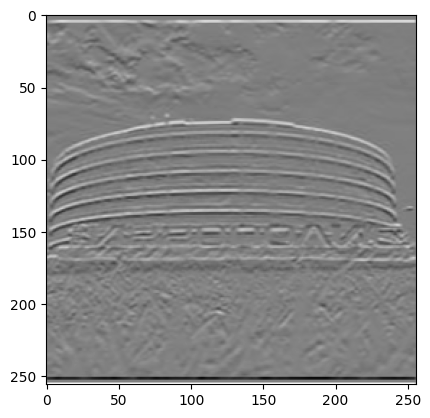

In [ ]:
# apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
    w, h = img.shape[0], img.shape[1]
    f = kernel.shape[0]
    if (f - 1) % 2 !=0 :
        print("failure to choose apt padding, choose another filter size!")
    padding = (f - 1)//2
    padded_img = np.lib.pad(img, ((padding, padding), (padding, padding)), 'constant', constant_values = ((0,0),(0,0)))
    result = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            # we chose padding size such that when sliding through the padded image
            # with the kernel we obtain exactly same dimensionality (w x h)
            result[i,j] = np.sum(padded_img[i:i + f, j:j+f] * kernel)
    return result

c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')

Vertical kernel applied


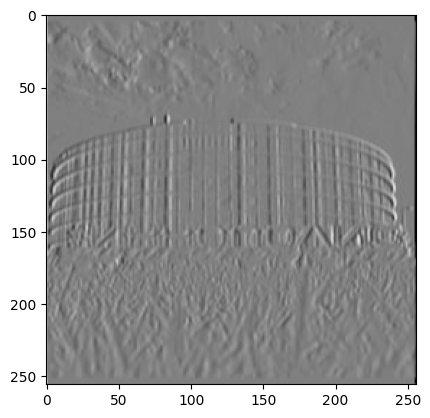

In [ ]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Your kernel applied


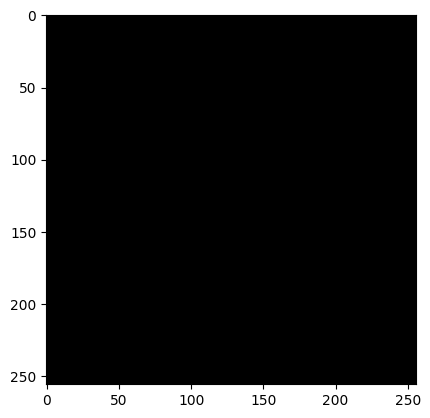

In [ ]:
# play with numbers, see how changing the kernel affects the result
your_kernel = np.array([[0, 0, 0],
                        [0, 0, 0],
                        [0, 0, 0]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

Negative kernel applied


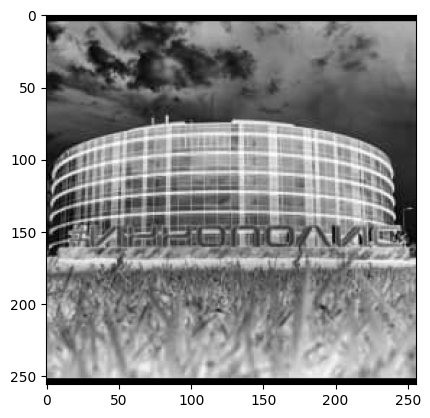

In [ ]:
# Define the kernel that will result in reversed image, in which the lightest areas of
# the photographed subject appear darkest and the darkest areas appear the lightest.
negative_kernel = np.array([[-1]])

c = convolve(gray_image, negative_kernel)
print("Negative kernel applied")
plt.imshow(c, cmap='gray')

### Define the kernel that will result in a blurred image

Blur kernel applied


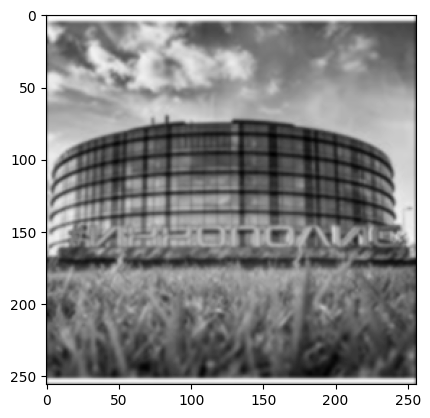

In [ ]:
# Define the kernel that will result in a blurred image
v1 = 0.5
v = 0.1
# this is an example of ~ gaussian blur
blur_kernel = np.array([[v, v, v, v, v],
                        [v, v1, v1, v1, v],
                        [v, v1, 2, v1, v],
                        [v, v1, v1, v1, v],
                        [v, v, v, v, v]])

#simple sum
blur_kernel2 = np.ones((11,11))

c_blurred = convolve(gray_image, blur_kernel)
print("Blur kernel applied")
plt.imshow(c_blurred, cmap='gray')

Sharpen kernel applied


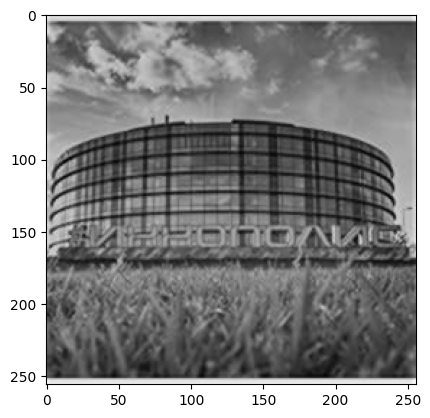

In [ ]:
# Now let's sharpen the blurred image back
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

c = convolve(c_blurred, sharpen_kernel)
print("Sharpen kernel applied")
plt.imshow(c, cmap='gray')

## 3. CNN with PyTorch

### 3.1. Data Loading

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

In [ ]:
batch_size = 32
test_batch_size = 100

# Transformations
data_transformations = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])

# Data Source
mnist_train = datasets.MNIST('../data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('../data', train=False,
                            transform=data_transformations)


# Data loaders
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 73999332.98it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56447201.22it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 53027030.69it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10855002.15it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



### 3.2 CNN model

In [ ]:
class CNN(nn.Module):
    # Convolution formula: ((n + 2p - f) / s) + 1

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc_drop = nn.Dropout(p=0.5)

    def forward(self, x):
        # Exercise: calclulate shape after each layer
        #print(f'Input shape: {x.shape}')
        x = torch.relu(F.max_pool2d(self.conv1(x), 2))
        size = (28 + 2*0 - 5) + 1 # after conv1
        size = size//2 # after maxpool
        #print(f'After conv1+pooling: calculated: {size}x{size}x10, actual: {x.shape}')
        x = self.conv2_drop(torch.relu(F.max_pool2d(self.conv2(x), 2)))
        size = (size + 2*0 - 5) + 1 # after conv2
        size = size//2 # after maxpool
        #print(f'After conv2+pooling: calculated: {size}x{size}x20, actual: {x.shape}')
        x = x.view(-1, size*size*20)
        size = size*size*20
        #print(f'After view: calculated: {1}x{320}, actual: {x.shape}')
        x = torch.relu(self.fc1(x))
        #print(f'After fc1: calculated: {1}x50, actual: {x.shape}')
        x = self.fc_drop(self.fc2(x))
        #print(f'After fc2: calculated: {1}x10, actual: {x.shape}')
        return F.log_softmax(x, dim=1)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = CNN().to(device)

## 2.2 Fully-conected model from the last class

 TASK: reducing number of params to match that of CNN

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO: reducing number of params to match that of CNN
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 10)

    def forward(self, x):
        # TODO: implement forward pass
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_nn = Net().to(device)

### Counting number of model trainable parameters

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
# Let's compare the number of parameters of these models:
print("Number of params in the Fully-connected model:", count_parameters(model_nn))
print("Number of params in the CNN model:", count_parameters(model_cnn))

Number of params in the Fully-connected model: 548410
Number of params in the CNN model: 21840


Task: Try changing the fully-connected model to have the same number of parameters as CNN and compare the resulting performance

## 3. Training and testing

In [ ]:
def train(model, device, train_loader, optimizer, epoch, log_interval=700):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## Training the CNN model

In [ ]:
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 700

# training CNN model
model = model_cnn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.328258
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.939252
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.803815

Test set: Average loss: 0.1623, Accuracy: 9607/10000 (96.07%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.291155
Train Epoch: 2 [22400/60000 (37%)]	Loss: 0.886119
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.839712

Test set: Average loss: 0.0993, Accuracy: 9739/10000 (97.39%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.924195
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.938641
Train Epoch: 3 [44800/60000 (75%)]	Loss: 1.300414

Test set: Average loss: 0.0793, Accuracy: 9795/10000 (97.95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.110688
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.846658
Train Epoch: 4 [44800/60000 (75%)]	Loss: 1.338071

Test set: Average loss: 0.0755, Accuracy: 9795/10000 (97.95%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.984053
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.670769
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.993297

Test set: Average 

## Train the fully-connected model

In [ ]:
model = model_nn
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

torch.save(model.state_dict(), "mnist_nn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.007676
Train Epoch: 1 [22400/60000 (37%)]	Loss: nan
Train Epoch: 1 [44800/60000 (75%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (9.80%)

Train Epoch: 2 [0/60000 (0%)]	Loss: nan
Train Epoch: 2 [22400/60000 (37%)]	Loss: nan
Train Epoch: 2 [44800/60000 (75%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (9.80%)

Train Epoch: 3 [0/60000 (0%)]	Loss: nan
Train Epoch: 3 [22400/60000 (37%)]	Loss: nan
Train Epoch: 3 [44800/60000 (75%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (9.80%)

Train Epoch: 4 [0/60000 (0%)]	Loss: nan
Train Epoch: 4 [22400/60000 (37%)]	Loss: nan
Train Epoch: 4 [44800/60000 (75%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (9.80%)

Train Epoch: 5 [0/60000 (0%)]	Loss: nan
Train Epoch: 5 [22400/60000 (37%)]	Loss: nan
Train Epoch: 5 [44800/60000 (75%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (9.80%)

Train Epoch: 6 [0/60000 (0%)]	Loss: nan
Train Epo

## Self-practice Task

Train a CNN model and predict the categories in `Caltech 256` dataset:
1. Load the data from `torchvision.datasets.Caltech256`
1. Split the data to train, validation and test
1. Define a CNN model with achitecture of your choice
1. Train the model and log the loss and accuracy at every epoch (on train, validation and test set)
1. Use a pretrained (such as `VGG16`) model for the same task and compare the models number of parameters together with accuracy

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229,0.224,0.225])
])

In [ ]:
torch.manual_seed(42)

# Check for GPU availability
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'https://www.kaggle.com/jessicali9530/caltech256'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ildarzalyaliev
Your Kaggle Key: ··········


100%|██████████| 2.12G/2.12G [00:25<00:00, 90.7MB/s]


In [ ]:
device

device(type='cuda')

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

caltech256_dataset = ImageFolder(root='/content/caltech256/256_objectcategories', transform=transform)

batch_size = 64
caltech256_loader = DataLoader(caltech256_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5) # 224x224x3 -> 220x220x16
        self.pool = nn.MaxPool2d(2, 2) # 220x220x16 -> 110x110x16
        self.conv2 = nn.Conv2d(16, 32, 5) # 110x110x16 -> 106x106x32
        self.pool2 = nn.MaxPool2d(2, 2) # 106x106x32 -> 53x53x32
        self.conv3 = nn.Conv2d(32, 64, 6) # 53x53x32 -> 48x48x64
        self.pool3 = nn.MaxPool2d(2, 2) # 48x48x64 -> 24x24x64
        self.fc1 = nn.Linear(24 * 24 * 64, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool2(self.conv2(x)))
        x = F.relu(self.pool3(self.conv3(x)))
        x = x.view(-1, 24 * 24 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
device

device(type='cuda')

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
model = CustomCNN(257).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(caltech256_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')



In [ ]:
torch.save(model.state_dict(), 'caltech256_model.pth')

# Load the model
model = CustomCNN(num_classes)
model.load_state_dict(torch.load('caltech256_model.pth'))
model.eval()  # Set the model to evaluation mode

In [ ]:
target_classes = caltech256_dataset.categories
print(f'Number of classes: {len(target_classes)}')

In [ ]:
print(caltech256_dataset[0][0].shape)

In [ ]:
from torch.utils.data import random_split
dataset_size = len(caltech256_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

train_data, val_data, test_data = random_split(caltech256_dataset, [train_size, val_size, test_size])
print(f'Train size: {len(train_data)} ({len(train_data)/dataset_size*100:.2f}%)')
print(f'Validation size: {len(val_data)} ({len(val_data)/dataset_size*100:.2f}%)')
print(f'Test size: {len(test_data)} ({len(test_data)/dataset_size*100:.2f}%)')

In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=257):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = torch.relu(self.maxpool1(self.conv1(x)))
        x = torch.relu(self.maxpool2(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    train_loss = 0
    losses = []
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        losses.append(loss.item())
        if batch_idx % (len(train_loader) // 4) == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tAverage loss: {:.4f}'.format(
                epoch, batch_idx * len(inputs), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), train_loss / (batch_idx + 1)))

    return losses

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, \
    confusion_matrix
import seaborn as sns


def test(model, test_loader, criterion, c_m=False):
    model.eval()
    test_loss = 0
    correct = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            test_loss += criterion(outputs, labels).item()
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(labels.view_as(pred)).sum().item()

            y_true.extend(labels.tolist())
            y_pred.extend(pred.squeeze().tolist())

    test_loss /= len(test_loader.dataset)
    print(f'Average loss: {test_loss:.4f}')

    print(f'\nAccuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_true, y_pred, average="macro")}')
    print(f'F1: {f1_score(y_true, y_pred, average="macro")}\n')
    if c_m:
        print(classification_report(y_true, y_pred))
        plt.figure(figsize=(12, 10))
        conf_mat = confusion_matrix(y_true, y_pred)
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')

In [ ]:
losses = []
for epoch in range(1, 10 + 1):
    l = train(model, train_loader, optimizer, criterion, epoch)
    losses.extend(l)
    test(model, val_loader, criterion)

In [ ]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)